# Preprocessing Functions

## This workbook
* Imports sound files from the SAIE dataset
* Graphs and calculates the features
* Adds the features to a Dataframe, then saves down the sample data for input in the classification model 

## To do


## Updates

* 0_71 Output data in HDF format to preserve data structures
* 0_70 Store sample number and sample file names and add them to the dataframe
* 0_69 Clean up and check code and data; add exports of samples to WAV files
* 0_68 Sample recordings every SAMPLE_LENGTH seconds.  Add these samples to the dataframe exported along with statistics for the sample alone.  
* 0_67 Added DER Derry data,  Added regex for Windows file formats on Core i5
* 0_66 Added DOW Down data, later removed it
* 0_65 Added ANT Antrim and BEL Belfast sound data, added rational expression to deal with the urban/rural and size codes in the SAIE filenames
* 0_63,4 add conversion of MP3 to WAV, add extraction of county, town, gender and age codes
* 0_6 add code for dataframe definition and export
* 0_5 added graphing of spectrogram
* 0_4 loaded Dublin full-text data

In [1]:
from datetime import datetime

# Get the current system date and time
now = datetime.now()

# Format the date and time as yyyymmdd_hhmm
formatted_date_time = now.strftime("%Y%m%d_%H%M")

# Save it to a variable
date_time_variable = formatted_date_time

# Print the variable to verify
print(date_time_variable)

20240807_1841


In [2]:
import os

In [3]:
os.getcwd()

'/Users/peternolan/Documents/voxpop/Clustering'

In [26]:
DIR_PATH=r'/Users/peternolan/Documents/voxpop/notebooks/DUB/*.wav'

#DIR_PATH=r'/Users/peternolan/Documents/voxpop/notebooks/NI/DER/*.wav'
#DIR_PATH=r"C:\Users\peter\VoxPop\DER\*.wav" # Derry input files
#DIR_PATH=r"C:\Users\peter\VoxPop\ANT\*.wav" # Antrim input files
#DIR_PATH=r"C:\Users\peter\VoxPop\DUB\*.wav" # Dublin input files

#DIR_PATH='C:\\Users\\GGMachines_Gaming\\Documents\\DUB\\*.wav'

#DIR_PATH='C:\\Users\\GGMachines_Gaming\\Documents\\DUB\\*.wav'

In [5]:
# !pip install librosa

In [6]:
import librosa
librosa.__version__ 

'0.10.1'

In [7]:
import matplotlib
import librosa.display

In [8]:
import numpy as np 
np.__version__

'1.25.0'

In [9]:
import pandas as pd
pd.__version__

'2.1.4'

In [10]:
import soundfile as sf

In [11]:
import math

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use("seaborn")
import glob
import IPython
from IPython.display import Audio
import re
import csv

In [13]:
from pydub import AudioSegment
import soundfile as sf
import os

In [14]:
import tables

ModuleNotFoundError: No module named 'tables'

In [27]:
filenames=[]
sr=[]
dur=[]
y=[]
names=[]

## Global Variables

In [28]:
#DATASET_NAME = "ANT" # Antrim (ANT) and Belfast (BEL)voice recordings datasets

DATASET_NAME = "DUB" # Dublin (DUB) voice recordings datasets

In [29]:
os.getcwd()

'/Users/peternolan/Documents/voxpop/Clustering'

In [30]:
SAMPLE_OUTPUT_DIRECTORY="C:\\Users\\GGMachines_Gaming\\Documents\\sample_output_directory\\"

In [31]:
os.chdir(SAMPLE_OUTPUT_DIRECTORY)
os.getcwd()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\GGMachines_Gaming\\Documents\\sample_output_directory\\'

In [32]:
SAMPLE_LENGTH=1 # seconds

In [33]:
#RESAMPLE_RATE=8000
RESAMPLE_RATE=22050

In [34]:
os.getcwd()

'/Users/peternolan/Documents/voxpop/Clustering'

In [35]:
DIR_PATH

'/Users/peternolan/Documents/voxpop/notebooks/DUB/*.wav'

In [36]:
res = glob.glob(DIR_PATH)
for filename in res:
    filenames.append(filename)

In [37]:
len(filenames)

167

In [38]:
def sample_duration(filename):
    d=(librosa.get_duration(path=filename))
    d=int(d*100)/100
    return d

In [39]:
def convert_MP3_to_WAV(convertfile):
    print(convertfile)
    convertaudio = AudioSegment.from_mp3(convertfile)
    convertaudio.export("convertfile.wav", format="wav")
    dur=sample_duration("convertfile.wav")
    y, sr = librosa.load("convertfile.wav",duration=dur)
    return y,sr

In [40]:
filenames

['/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_40.wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Finglas_F_35.wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_MountMerrion_M_20.wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_30.wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Terenure_F_20_(3).wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Malahide_F_20.wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dalkey_F_20.wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Rathfarnham_M_20_(2).wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Blanchard_M_20_(4).wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_20_(3).wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_20_(2).wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Clontarf_M_20_(3).wav',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Monkstown_M_20.w

In [41]:
for i in filenames: 
#    names.append(re.search(r'/([^/]+)\.wav$',i).group(1)) MacOs version
    names.append(re.search(r'([^\\]+).wav$',i).group(1)) #Windows version


In [42]:
len(names)

167

In [43]:
names

['/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_40',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Finglas_F_35',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_MountMerrion_M_20',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_30',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Terenure_F_20_(3)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Malahide_F_20',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dalkey_F_20',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Rathfarnham_M_20_(2)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Blanchard_M_20_(4)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_20_(3)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_20_(2)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Clontarf_M_20_(3)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Monkstown_M_20',
 '/Users/peternolan/Documents/voxpop/notebooks/

In [45]:
counties=[]
towns=[]
genders=[]
urbanrurals=[]
sizes=[]
ages=[]  

In [46]:
pattern1 = r'(?P<county>[a-zA-Z]+)_(?P<town>[a-zA-Z-]+)_(?P<gender>[MF])_(?P<age>\d+)'
pattern2 = r'(?P<county>[a-zA-Z]+)_(?P<town>[a-zA-Z-]+)_(?P<urbanrural>[UR])(?P<size>[12])_(?P<gender>[MF])_(?P<age>\d+)'

h=0

# Loop through the strings and extract the variables
for string in names:
    match1 = re.match(pattern1, string)
    match2 = re.match(pattern2, string)

    print(str(h)+" "+string)

    if match1:
        county = match1.group('county')
        counties.append(county)
        
        town = match1.group('town')
        towns.append(town)
        
        urbanrurals.append(None)
        sizes.append(None)
        
        gender = match1.group('gender') 
        genders.append(gender)
        
        age = int(match1.group('age'))
        ages.append(age)
        
    elif match2:
        county = match2.group('county')
        counties.append(county)
        
        town = match2.group('town')
        towns.append(town)
        
        urbanrural = match2.group('urbanrural')  # 'U' or 'R'
        urbanrurals.append(urbanrural)
        
        size=match2.group('size')
        sizes.append(size)
        
        gender = match2.group('gender')  # '1' or '2'
        genders.append(gender)
        
        age = int(match2.group('age'))
        ages.append(age)
        
   #     print(county,town,gender,age)
   #     print("\n")
    h+=1


0 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_40
1 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Finglas_F_35
2 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_MountMerrion_M_20
3 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_30
4 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Terenure_F_20_(3)
5 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Malahide_F_20
6 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dalkey_F_20
7 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Rathfarnham_M_20_(2)
8 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Blanchard_M_20_(4)
9 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_20_(3)
10 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_20_(2)
11 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Clontarf_M_20_(3)
12 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Monkstown_M_20
13 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Sutton_F_20
14

In [47]:
counties

[]

In [48]:
names

['/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_40',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Finglas_F_35',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_MountMerrion_M_20',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_30',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Terenure_F_20_(3)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Malahide_F_20',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dalkey_F_20',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Rathfarnham_M_20_(2)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Blanchard_M_20_(4)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_20_(3)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_20_(2)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Clontarf_M_20_(3)',
 '/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Monkstown_M_20',
 '/Users/peternolan/Documents/voxpop/notebooks/

In [49]:
towns

[]

In [50]:
urbanrurals

[]

In [51]:
genders

[]

In [52]:
sizes

[]

In [53]:
ages

[]

In [54]:
print(len(counties))
print(len(towns))
print(len(urbanrurals))
print(len(sizes))
print(len(genders))
print(len(ages))

0
0
0
0
0
0


In [55]:
h=0
for filename in filenames:
    file_duration=sample_duration(filename)
    file_y, file_sr= librosa.load(filename,duration=sample_duration(filename))
    
    if len(file_y)==0:
        print("MP3 converted to WAV\n")
        print(str(h))
        file_y, file_sr=convert_MP3_to_WAV(filename)
         
    resample_y=librosa.resample(file_y, orig_sr=file_sr, target_sr=RESAMPLE_RATE)
    
    y.append(resample_y)
    sr.append(RESAMPLE_RATE)
    dur.append(file_duration)
    h+=1

MP3 converted to WAV

0
/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_40.wav
MP3 converted to WAV

3
/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_30.wav
MP3 converted to WAV

9
/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_20_(3).wav
MP3 converted to WAV

10
/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_20_(2).wav
MP3 converted to WAV

11
/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Clontarf_M_20_(3).wav
MP3 converted to WAV

12
/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Monkstown_M_20.wav
MP3 converted to WAV

15
/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dundrum_F_20.wav
MP3 converted to WAV

18
/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Swords_F_35.wav
MP3 converted to WAV

20
/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Rathmines_M_20.wav
MP3 converted to WAV

22
/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Killiney_M_20_(2).wav
MP3 converted to WAV

24
/Us

In [56]:
len(y)

167

In [69]:
len(filenames)

167

In [70]:
y[0].shape

(2944337,)

In [71]:
for i in range(0,len(filenames)):
    print(str(i)+" "+filenames[i])
    #print(y[i][0])
   #IPython.display.display(Audio(data=y[i], rate=sr[i]))

0 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_40.wav
1 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Finglas_F_35.wav
2 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_MountMerrion_M_20.wav
3 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_30.wav
4 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Terenure_F_20_(3).wav
5 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Malahide_F_20.wav
6 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dalkey_F_20.wav
7 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Rathfarnham_M_20_(2).wav
8 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Blanchard_M_20_(4).wav
9 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_20_(3).wav
10 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_20_(2).wav
11 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Clontarf_M_20_(3).wav
12 /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Monkstown_M_20.wav
13 /Users/peternol

In [72]:
'''h=0
for i,j,k in zip(filenames,y,sr):
    print(str(h)+i)
    IPython.display.display(Audio(data=i, rate=j))
    h+=1
'''

'h=0\nfor i,j,k in zip(filenames,y,sr):\n    print(str(h)+i)\n    IPython.display.display(Audio(data=i, rate=j))\n    h+=1\n'

In [73]:
#Check filens are all successfully converted to WAV
h=-1
for i,j,k in zip(y,sr,names):
    h+=1
    if len(i)==0: 
        print("Broken: "+str(k))
    else:
        print(str(h)+" OK: "+str(k))
        continue

0 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_40
1 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Finglas_F_35
2 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_MountMerrion_M_20
3 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_30
4 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Terenure_F_20_(3)
5 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Malahide_F_20
6 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dalkey_F_20
7 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Rathfarnham_M_20_(2)
8 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Blanchard_M_20_(4)
9 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_20_(3)
10 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Dunleary_M_20_(2)
11 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Clontarf_M_20_(3)
12 OK: /Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Monkstown_M_20
13 OK: /Users/pete

In [74]:
samples=[]

In [75]:
len(y)

167

In [76]:
# Create samples from each recording file
h=0
for j in y:
  
    num_samples=math.floor(len(j)/(sr[h]*SAMPLE_LENGTH))
    #print(h,names[h])
    sample=[]
    
    for i in range(0,num_samples):
        sample_start=i*sr[0]*SAMPLE_LENGTH
        sample_end=(i+1)*sr[0]*SAMPLE_LENGTH 
        sample.append(j[sample_start:sample_end])
        
        #if len(sample.size==0: 
        #    sample=new_sample
        #else: 
        #    sample=np.append(sample,[new_sample],axis=0)
        #print(i,sample_start/sr[h],sample_end/sr[h])
    h+=1
    samples.append(sample)


In [77]:
len(samples)

167

In [78]:
samples[0][0].shape

(22050,)

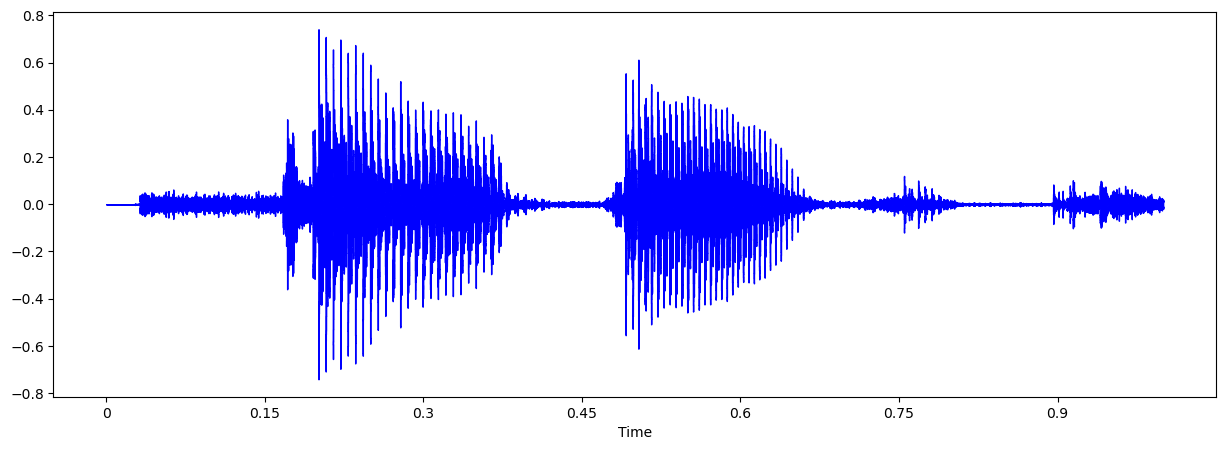

In [79]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y=samples[0][0], sr=sr[0], label=names[0],color='b')

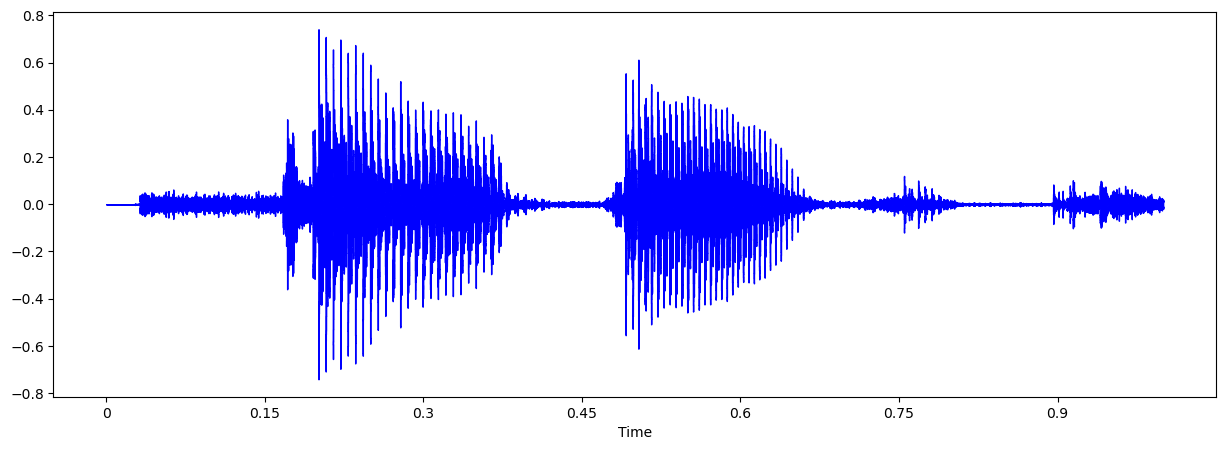

In [80]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y=y[0][0:22050], sr=sr[0], label=names[0],color='b')

In [81]:
print(names[0])
IPython.display.display(Audio(data=samples[0][0], rate=sr[0]))

/Users/peternolan/Documents/voxpop/notebooks/DUB/DUB_Tallaght_M_40


### Print waveform of all input sound files

In [ ]:
h=0
for i,j,k in zip(y,sr,names):
    print(h)
    #plt.subplot(len(y),1,h)
    librosa.display.waveshow(y=i, sr=j, label=k,color='b')
    plt.legend()
    plt.show()
    h+=1

In [ ]:
mfccs = librosa.feature.mfcc(y=samples[0][0], sr=sr[0], n_mfcc=30)
print(mfccs.shape)

plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, sr=sr[0], x_axis='time',y_axis="mel")
plt.show()

In [ ]:
Ydb=[]

In [ ]:
# graph power for every single input file 
h=0
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    Y=librosa.stft(i)
    Ydb.append(librosa.amplitude_to_db(abs(Y)))
    librosa.display.specshow(Ydb[-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    print(str(h)+" "+k)
    plt.title(k)
    plt.figure(figsize=(7, 2.5))
    plt.show()
    h+=1

In [ ]:
len(Ydb)

In [ ]:
Ydb[0].shape

In [ ]:
"""
Y = librosa.stft(y[0])
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr[0], x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()    
""" 

## Calculate Features by Sample

In [82]:
Ydb=[]
mfcc=[]
mfcc_delta=[]
mfcc_delta_2=[]
sample_file_names=[]

In [83]:
#Calculate features for each sample by iteration through the samples; add each to a master list
h=0
for i in samples:
    for j in i:
        Y=librosa.stft(j)
        Ydb.append(librosa.amplitude_to_db(abs(Y)))
        mfcc.append(librosa.feature.mfcc(y=j, sr=sr[h]))
        mfcc_delta.append(librosa.feature.delta(mfcc[-1]))
        mfcc_delta_2.append(librosa.feature.delta(mfcc[-1], order=2))

    h+=1        

In [84]:
print(len(Ydb))
print(Ydb[0].shape)

15100
(1025, 44)


In [88]:
mfcc[0].shape

(20, 44)

### Iterate through the recordings and save the samples

In [62]:
# iterate through the recordings and save them 

h=0
for i in range(0,len(samples)):
    for j in range(0,len(samples[i])):
        sample_file_names.append(names[i]+"_Rec_"+str(i)+"_Sample_"+str(j)+".wav")
        #print(sample_file_names[h])
        sf.write(SAMPLE_OUTPUT_DIRECTORY+sample_file_names[h], samples[i][j], sr[i], subtype='PCM_24')
        h+=1


In [63]:
'''
# Calculate the features by recording, iterating through the recordings
for i,j in zip(samples,sr):
    mfcc.append(librosa.feature.mfcc(y=i, sr=j))
    mfcc_delta.append(librosa.feature.delta(mfcc[-1]))
    mfcc_delta_2.append(librosa.feature.delta(mfcc[-1], order=2))
'''

'\n# Calculate the features by recording, iterating through the recordings\nfor i,j in zip(samples,sr):\n    mfcc.append(librosa.feature.mfcc(y=i, sr=j))\n    mfcc_delta.append(librosa.feature.delta(mfcc[-1]))\n    mfcc_delta_2.append(librosa.feature.delta(mfcc[-1], order=2))\n'

In [64]:
print(len(Ydb))
print(len(mfcc))
print(len(mfcc_delta))
print(len(mfcc_delta_2))
print(len(Ydb))
print(len(sample_file_names))

15100
15100
15100
15100
15100
15100


## Graph features by recording

In [ ]:
# Graph the feature for each recording
h=1
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    #Y=librosa.stft(i)
    #Ydb.append(librosa.amplitude_to_db(abs(Y)))
    print(str(h)+": "+k)
    librosa.display.specshow(mfcc[h-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    plt.title(k+" "+r'MFCC')
    plt.figure(figsize=(14, 5))
    plt.show()
    h+=1

In [ ]:
# Graph the feature for each recording
h=1
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    #Y=librosa.stft(i)
    #Ydb.append(librosa.amplitude_to_db(abs(Y)))
    librosa.display.specshow(mfcc_delta[h-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    print(str(h)+": "+k)
    plt.title(k+" "+r'MFCC-$\Delta$')
    plt.figure(figsize=(14, 5))
    plt.show()
    h+=1

In [ ]:
# Graph the feature for each recording
h=1
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    Y=librosa.stft(i)
    #Ydb.append(librosa.amplitude_to_db(abs(Y)))
    librosa.display.specshow(mfcc_delta_2[h-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    print(str(h)+": "+k)
    plt.title(k+" "+r'MFCC-$\Delta^2$')
    plt.figure(figsize=(14, 5))
    plt.show()
    h+=1

## Define and export the DataFrame of Samples and their Characteristics

In [65]:
print(len(filenames))
print(len(names))
print(len(dur))
print(len(y))
print(len(sr))
print(len(Ydb))
print(len(mfcc))
print(len(mfcc_delta))
print(len(mfcc_delta_2))

167
167
167
167
167
15100
15100
15100
15100


In [66]:
del(df)

NameError: name 'df' is not defined

In [67]:
df_columns=[
    "filenames","names","counties","towns","urbanrural","size","genders","ages","dur","recording num","sample num","sample file name","sample","Ydb","sr","mfcc","mfcc_delta","mfcc_delta_2"
]

In [68]:
df=pd.DataFrame(columns=df_columns)

In [69]:
df[80:84]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2


In [70]:
h=0
for i in range(0,len(samples)):
    for j in range(0,len(samples[i])):
        #insert_row=pd.DataFrame([{"filenames":i,"names":j}])
        insert_row= pd.DataFrame([{"filenames":filenames[i], 
                      "names":names[i],
                      "counties":counties[i],
                      "towns":towns[i],
                      "urbanrural":urbanrurals[i],
                      'size':sizes[i],
                      'genders':genders[i],
                      'ages':ages[i],
                      'dur':dur[i],
                      'recording num':i,
                      'sample num':j,
                      'sample file name':sample_file_names[h],
                      'sample': samples[i][j],
                      'Ydb': Ydb[h],
                      'sr': sr[i],
                      'mfcc': mfcc[h],
                      'mfcc_delta': mfcc_delta[h],
                      'mfcc_delta_2': mfcc_delta_2[h]}])
        df = pd.concat([df,insert_row],ignore_index=True)
        h+=1

C:\Users\GGMachines_Gaming\AppData\Local\Temp\ipykernel_20120\4282055374.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,insert_row],ignore_index=True)


In [ ]:
#df['sample'] = df['sample'].apply(lambda x: ','.join(map(str, x)))

In [71]:
df.shape

(15100, 18)

In [73]:
df[80:84]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2
80,C:\Users\GGMachines_Gaming\Documents\DUB\DUB_A...,DUB_Artane_M_20,DUB,Artane,None,None,M,20,81.63,0,80,DUB_Artane_M_20_Rec_0_Sample_80.wav,"[0.016045244, -0.008315919, -0.02204391, -0.03...","[[-12.405441, -23.336725, -18.446842, -29.9625...",22050,"[[-172.02167, -152.49522, -210.45895, -236.481...","[[4.7096677, 4.7096677, 4.7096677, 4.7096677, ...","[[7.1288533, 7.1288533, 7.1288533, 7.1288533, ..."
81,C:\Users\GGMachines_Gaming\Documents\DUB\DUB_A...,DUB_Artane_M_20_(2),DUB,Artane,None,None,M,20,94.28,1,0,DUB_Artane_M_20_(2)_Rec_1_Sample_0.wav,"[-1.1641532e-10, -9.313226e-10, -4.656613e-09,...","[[-34.74787, -25.812857, -34.74787, -1.5363762...",22050,"[[-465.85907, -291.69635, -234.51353, -209.333...","[[41.190304, 41.190304, 41.190304, 41.190304, ...","[[-20.55139, -20.55139, -20.55139, -20.55139, ..."
82,C:\Users\GGMachines_Gaming\Documents\DUB\DUB_A...,DUB_Artane_M_20_(2),DUB,Artane,None,None,M,20,94.28,1,1,DUB_Artane_M_20_(2)_Rec_1_Sample_1.wav,"[0.005559768, -0.0043689166, -0.015258972, -0....","[[-27.40541, -27.653982, -38.927185, -23.75767...",22050,"[[-304.5896, -256.64023, -226.20067, -233.5788...","[[14.722461, 14.722461, 14.722461, 14.722461, ...","[[-0.2057181, -0.2057181, -0.2057181, -0.20571..."
83,C:\Users\GGMachines_Gaming\Documents\DUB\DUB_A...,DUB_Artane_M_20_(2),DUB,Artane,None,None,M,20,94.28,1,2,DUB_Artane_M_20_(2)_Rec_1_Sample_2.wav,"[0.015664967, 0.00853162, 0.0015324727, -0.005...","[[-17.89692, -20.57634, -35.879272, -35.879272...",22050,"[[-310.7319, -284.62164, -269.91156, -262.5582...","[[2.846156, 2.846156, 2.846156, 2.846156, 2.84...","[[-3.5868106, -3.5868106, -3.5868106, -3.58681..."


In [ ]:
'''
# DataFrame defintion by recording

df=pd.DataFrame(
    "filenames": filenames,
    "names": names,
    "counties": counties,
    "towns": towns,
    "urbanrural": urbanrurals,
    "size": sizes,
    "genders": genders,
    "ages": ages,
    "dur":dur,
    "y":y,
    "Ydb":Ydb,
    "sr":RESAMPLE_RATE,
    "mfcc":mfcc,
    "mfcc_delta":mfcc_delta,
    "mfcc_delta_2":mfcc_delta_2
'''

In [74]:
for i,j in enumerate(df.columns):
    print(str(i)+": "+j)

0: filenames
1: names
2: counties
3: towns
4: urbanrural
5: size
6: genders
7: ages
8: dur
9: recording num
10: sample num
11: sample file name
12: sample
13: Ydb
14: sr
15: mfcc
16: mfcc_delta
17: mfcc_delta_2


In [75]:
print(df.columns[12])
print(df.iloc[0,12])
print(type(df.iloc[0,12]))
print(len(df.iloc[0,12]))

sample
[1.5543122e-15 3.3306691e-15 3.5527137e-15 ... 5.3641959e-03 1.1229521e-02
 4.2106798e-03]
<class 'numpy.ndarray'>
22050


In [76]:
print(df.columns[15])
print(df.iloc[0,15])
print(type(df.iloc[0,15]))
print(len(df.iloc[0,15]))

mfcc
[[-6.55948975e+02 -6.15149475e+02 -3.28689148e+02 -2.42041382e+02
  -2.29819016e+02 -2.30740952e+02 -2.31494736e+02 -2.37771729e+02
  -2.43383575e+02 -2.44239014e+02 -2.46925751e+02 -2.44045013e+02
  -2.47751648e+02 -2.46066315e+02 -2.13540024e+02 -1.73564804e+02
  -1.58268784e+02 -1.35393005e+02 -8.36834335e+01 -6.17032051e+01
  -1.02409706e+02 -1.88199066e+02 -1.56439285e+02 -8.28446732e+01
  -7.13829651e+01 -8.93608780e+01 -1.06577187e+02 -1.34484665e+02
  -1.81219910e+02 -1.96185959e+02 -2.36586304e+02 -3.15856262e+02
  -2.96403931e+02 -2.59500793e+02 -2.45449478e+02 -1.78884460e+02
  -1.26896660e+02 -1.37021210e+02 -1.94928162e+02 -2.90242859e+02
  -3.20228729e+02 -2.86150604e+02 -2.46273132e+02 -2.74499146e+02]
 [ 0.00000000e+00  2.86086273e+01  1.02580528e+02  1.09890656e+02
   1.07779488e+02  1.10245888e+02  1.21057861e+02  1.27328232e+02
   1.28122559e+02  1.35064682e+02  1.31488373e+02  1.22285980e+02
   1.18880005e+02  1.12423599e+02  9.89670258e+01  9.64290237e+01
   1

In [77]:
df['sample'].iloc[0].shape

(22050,)

In [78]:
df['mfcc'].iloc[0].shape 

(20, 44)

In [ ]:
#df['sample'] = df['sample'].apply(lambda x: ','.join(map(str, x)))

In [ ]:
#df['mfcc'] = df['mfcc'].apply(lambda x: ','.join(map(str, x)))

In [79]:
# Get the current system date and time
start=datetime.now()

In [80]:
#df.to_csv(date_time_variable+"_"+DATASET_NAME+'_features.csv',mode='w')

In [81]:
#df.to_hdf(date_time_variable+"_"+DATASET_NAME+'_features_3.h5',key='df',mode='w',format='fixed')

In [82]:
df.to_pickle(date_time_variable+"_"+DATASET_NAME+'_features.pkl')

In [83]:
#df2=pd.read_pickle(date_time_variable+"_"+DATASET_NAME+'_features.pkl')